Implement Bayesian classifier - Binary data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
np.random.seed(10)
n_samples = 100
binary_class0 = np.random.binomial(1, 0.3, size=(n_samples, 2))
binary_class1 = np.random.binomial(1, 0.7, size=(n_samples, 2))
X_binary = np.vstack((binary_class0, binary_class1))
y_binary = np.array([0] * n_samples + [1] * n_samples)

In [7]:
def bayesian_binary_classifier(X_train, y_train, X_test):
    classes = np.unique(y_train)
    n_features = X_train.shape[1]
    priors = {}
    likelihoods = {}

    for c in classes:
        X_c = X_train[y_train == c]
        priors[c] = len(X_c) / len(X_train)
        likelihoods[c] = [np.mean(X_c[:, f]) for f in range(n_features)]

    predictions = []
    for x in X_test:
        posteriors = []
        for c in classes:
            posterior = np.log(priors[c])
            for f in range(n_features):
                p = likelihoods[c][f]
                posterior += x[f] * np.log(p + 1e-6) + (1 - x[f]) * np.log(1 - p + 1e-6)
            posteriors.append(posterior)
        predictions.append(classes[np.argmax(posteriors)])
    return np.array(predictions)

In [8]:
train_idx = np.random.choice(2 * n_samples, size=int(0.8 * 2 * n_samples), replace=False)
test_idx = np.setdiff1d(np.arange(2 * n_samples), train_idx)
X_train, y_train = X_binary[train_idx], y_binary[train_idx]
X_test, y_test = X_binary[test_idx], y_binary[test_idx]
y_pred = bayesian_binary_classifier(X_train, y_train, X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Binary Data Accuracy: {accuracy:.4f}")

Binary Data Accuracy: 0.6250


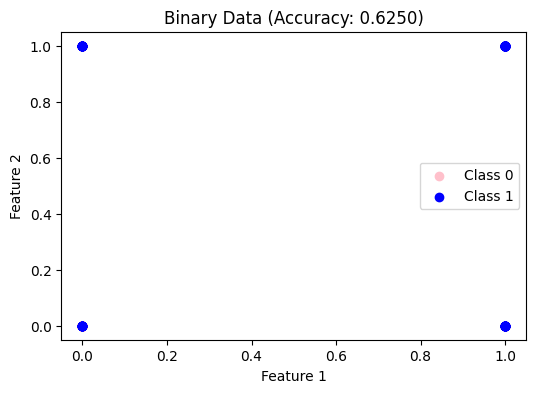

In [10]:

plt.figure(figsize=(6, 4))
plt.scatter(X_binary[y_binary == 0, 0], X_binary[y_binary == 0, 1], c='pink', label='Class 0')
plt.scatter(X_binary[y_binary == 1, 0], X_binary[y_binary == 1, 1], c='blue', label='Class 1')
plt.title(f"Binary Data (Accuracy: {accuracy:.4f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()